In [5]:
pip install psycopg2
pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import boto3
import psycopg2
import pandas as pd
client = boto3.client(service_name='redshift',
                      region_name='ap-south-1')

conn = psycopg2.connect(host = 'xyz',
                port = '5439',
                user = 'awsuser',
                password = 'xyz',
                database = 'dev'
                )

cursor = conn.cursor()
cursor.execute("select * from public.search_stats order by day")
results = cursor.fetchall()
df = pd.DataFrame(results)

df.columns = ['day','num_users','num_searches','num_rental_searches','num_sale_searches','num_none_searches']
 

In [3]:
df.dtypes

day                    object
num_users               int64
num_searches            int64
num_rental_searches     int64
num_sale_searches       int64
num_none_searches       int64
dtype: object

In [4]:
df.head(10)

,day,num_users,num_searches,num_rental_searches,num_sale_searches,num_none_searches
0,2021-07-02,4123,5579,1838,1907,1834
1,2021-07-03,4253,5645,1850,1900,1895
2,2021-07-04,4227,5659,1919,1856,1884
3,2021-07-05,4285,5751,1942,1865,1944
4,2021-07-06,4124,5579,1836,1920,1823
5,2021-07-07,4262,5635,1874,1895,1866
6,2021-07-08,4165,5524,1860,1750,1914
7,2021-07-09,4265,5662,1888,1931,1843
8,2021-07-10,4177,5556,1844,1849,1863
9,2021-07-11,4148,5606,1836,1938,1832


In [ ]:
## Business question

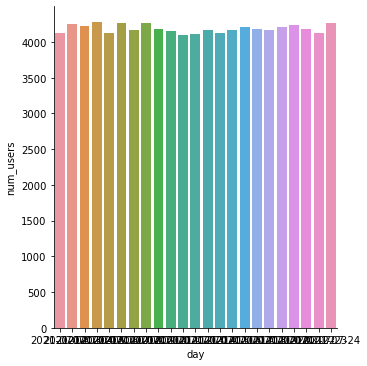

In [6]:
# lets look at how the number of users vary for each day


sns.catplot(x='day',y='num_users',data=df,kind='bar',ci=None)

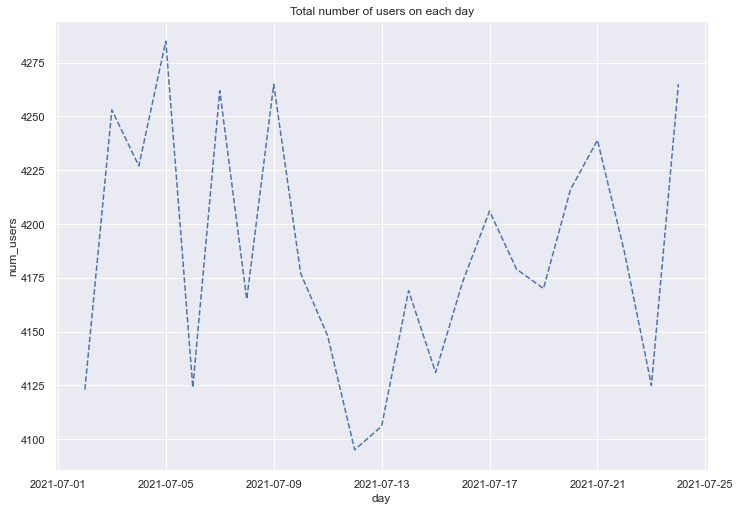

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="day", y="num_users",
             data=df)
ax.lines[0].set_linestyle("--")

plt.title('Total number of users on each day')
plt.show()


In [ ]:
# Observation - It can be generalized that the traffic seems to be increasing around end of the week days (starting from Thu,Fri)
# and post that we see a dip during the weekdays in the site traffic. Most interesting aspect in the traffic distribution is
#around 12/july (second week) when we see a sudden dip in site traffic which needs to be investiaged further.

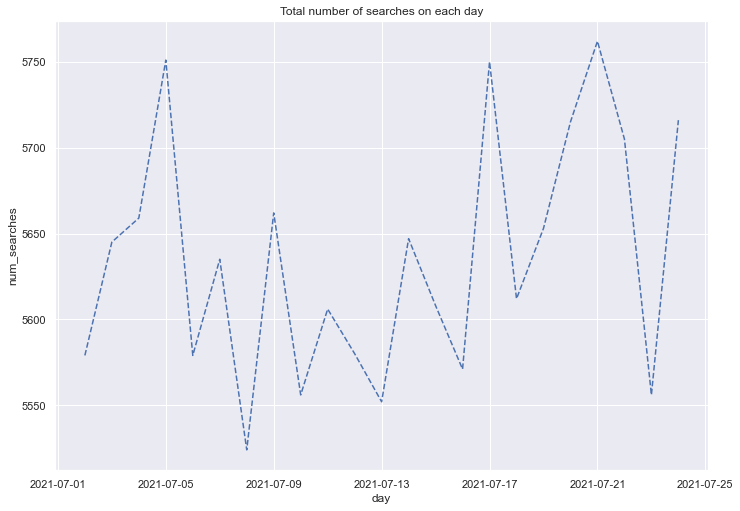

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="day", y="num_searches",
             data=df)
ax.lines[0].set_linestyle("--")

plt.title('Total number of searches on each day')
plt.show()


In [ ]:
# Observation - Around second week of july we see a dip in number of searches which is coherent with the findings in the user
# distribution graph. Also can see a spike in number of searches on - 5,17,21 July

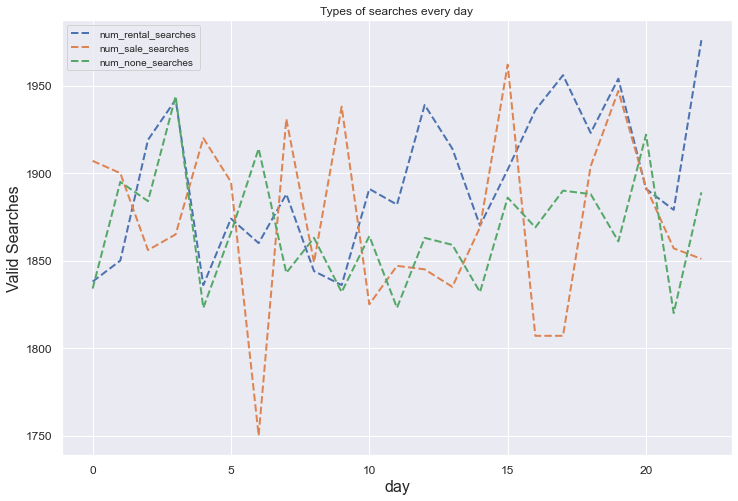

In [33]:
ax = df[['num_rental_searches', 
         'num_sale_searches', 
         'num_none_searches']].plot(figsize=(12, 8), fontsize=12, linewidth=2, linestyle='--')
ax.set_xlabel('day', fontsize=16)
ax.set_ylabel('Valid Searches', fontsize=16)
ax.set_title('Types of searches every day')
ax.legend(fontsize=10)
plt.show()

In [ ]:
# Observation - From the distirbution can infer that Rental searches is more engaging on the platform and attracting more users
# Also can infer that users are specific on the search type filter i.e chosing either 'Sale' Or 'Rent' on the search settings 
# this can be inferred from 'none-type' search distribution on the graph